In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn import preprocessing
from sklearn import tree

In [2]:
dataset=pd.read_csv("fatal-police-shootings-data.csv")
dataset.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6953 entries, 0 to 6952
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6953 non-null   int64  
 1   name                     6652 non-null   object 
 2   date                     6953 non-null   object 
 3   manner_of_death          6953 non-null   object 
 4   armed                    6742 non-null   object 
 5   age                      6592 non-null   float64
 6   gender                   6941 non-null   object 
 7   race                     5864 non-null   object 
 8   city                     6953 non-null   object 
 9   state                    6953 non-null   object 
 10  signs_of_mental_illness  6953 non-null   bool   
 11  threat_level             6953 non-null   object 
 12  flee                     6388 non-null   object 
 13  body_camera              6953 non-null   bool   
 14  longitude               

In [89]:
dataset.isnull().sum()

id                            0
name                        301
date                          0
manner_of_death               0
armed                       211
age                         361
gender                       12
race                       1089
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        565
body_camera                   0
longitude                   531
latitude                    531
is_geocoding_exact            0
dtype: int64

In [4]:
# doing drop value nan 
data_pre=dataset.dropna()
# data_pre.isnull.sum()
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 0 to 6914
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4940 non-null   int64  
 1   name                     4940 non-null   object 
 2   date                     4940 non-null   object 
 3   manner_of_death          4940 non-null   object 
 4   armed                    4940 non-null   object 
 5   age                      4940 non-null   float64
 6   gender                   4940 non-null   object 
 7   race                     4940 non-null   object 
 8   city                     4940 non-null   object 
 9   state                    4940 non-null   object 
 10  signs_of_mental_illness  4940 non-null   bool   
 11  threat_level             4940 non-null   object 
 12  flee                     4940 non-null   object 
 13  body_camera              4940 non-null   bool   
 14  longitude               

In [5]:
data_dipakai=data_pre[["name","manner_of_death","armed","age","gender"]]
data_dipakai.head()

,name,manner_of_death,armed,age,gender
0,Tim Elliot,shot,gun,53.0,M
1,Lewis Lee Lembke,shot,gun,47.0,M
2,John Paul Quintero,shot and Tasered,unarmed,23.0,M
3,Matthew Hoffman,shot,toy weapon,32.0,M
4,Michael Rodriguez,shot,nail gun,39.0,M


# Encode data

In [6]:
encoder=preprocessing.LabelEncoder()


data_dipakai["name"]=encoder.fit_transform(data_dipakai["name"]) # data X
data_dipakai["armed"]=encoder.fit_transform(data_dipakai["armed"]) #data X
data_dipakai["gender"]=encoder.fit_transform(data_dipakai["gender"]) # data X
data_dipakai["manner_of_death"]=encoder.fit_transform(data_dipakai["manner_of_death"]) # data Y

C:\Users\Reza\AppData\Local\Temp/ipykernel_10752/1742444150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dipakai["name"]=encoder.fit_transform(data_dipakai["name"]) # data X
C:\Users\Reza\AppData\Local\Temp/ipykernel_10752/1742444150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dipakai["armed"]=encoder.fit_transform(data_dipakai["armed"]) #data X
C:\Users\Reza\AppData\Local\Temp/ipykernel_10752/1742444150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

# Check Data after encode

In [7]:

data_dipakai.head()

,name,manner_of_death,armed,age,gender
0,4587,0,35,53.0,1
1,3054,0,35,47.0,1
2,2420,1,85,23.0,1
3,3300,0,84,32.0,1
4,3465,0,61,39.0,1


# Label data

In [8]:
Dec_Model=DecisionTreeClassifier()
dataX=data_dipakai[["name","armed","age","gender"]]
dataY=data_dipakai["manner_of_death"]

In [9]:
#Split and Train data
dataX_train, dataX_test, dataY_train, dataY_test = train_test_split(dataX, dataY, test_size=0.2,random_state=0)

In [10]:
Dec_Model=DecisionTreeClassifier(max_depth=3,criterion="gini")
Dec_Model.fit(dataX_train,dataY_train)

DecisionTreeClassifier(max_depth=3)

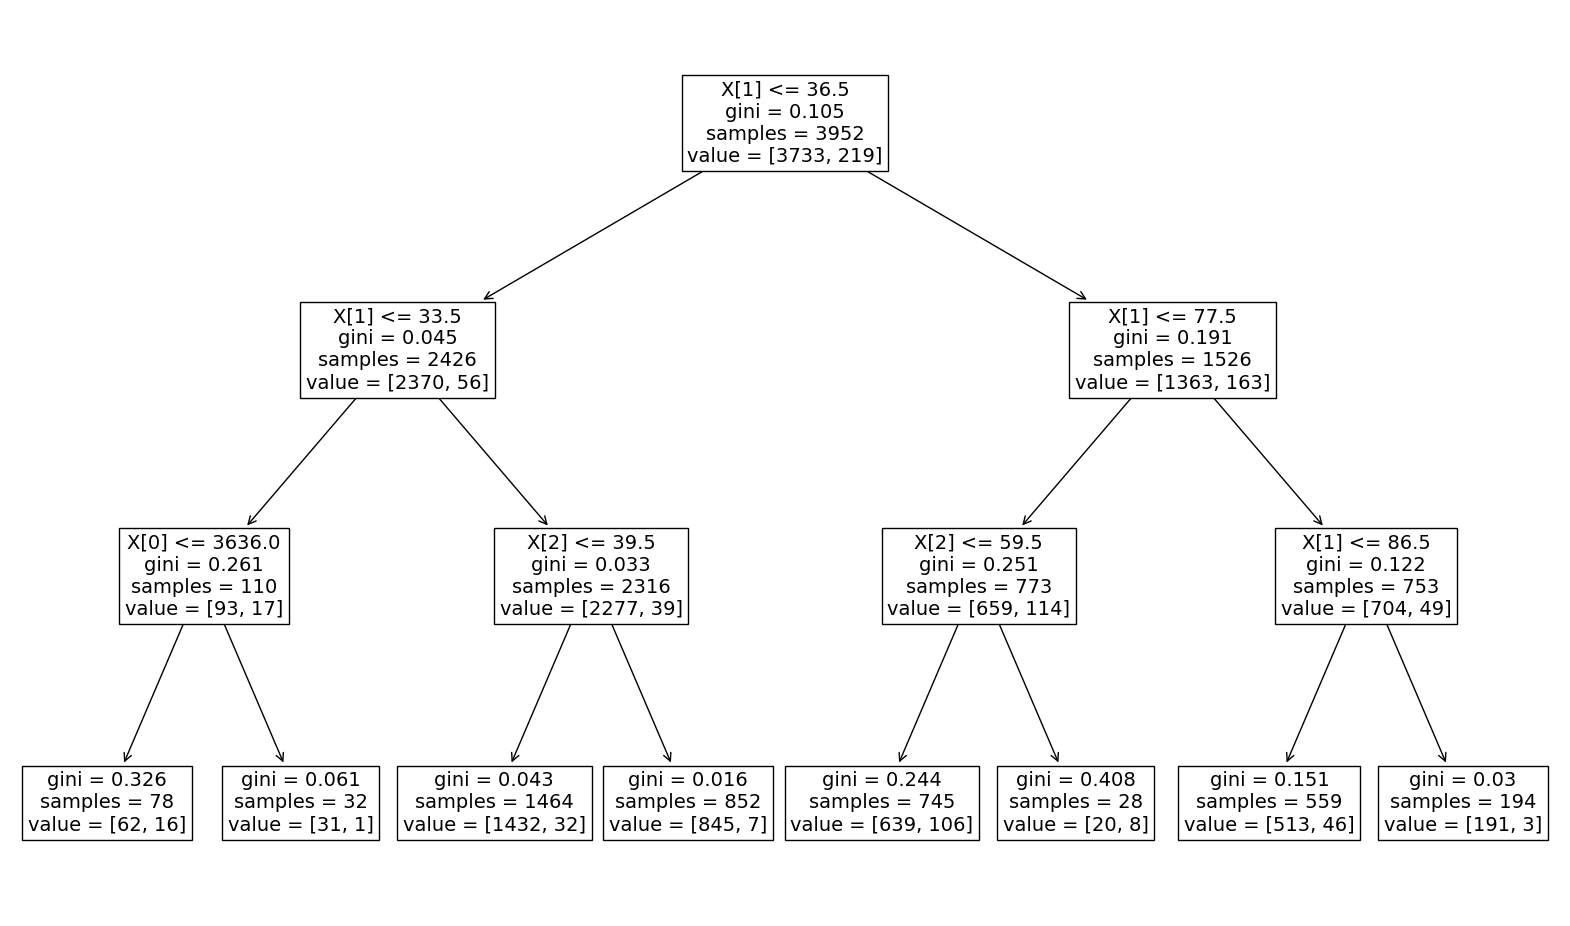

In [11]:
plt.rcParams['figure.dpi']=100
plt.subplots(figsize=(20,12))
tree.plot_tree(Dec_Model.fit(dataX_train,dataY_train),fontsize=14) 
plt.show()

In [11]:
data_dipakai.head()

,name,manner_of_death,armed,age,gender
0,4587,0,35,53.0,1
1,3054,0,35,47.0,1
2,2420,1,85,23.0,1
3,3300,0,84,32.0,1
4,3465,0,61,39.0,1


In [33]:


masukkanNama=int(input("Masukkan nama: "))
masukkan_Armed=int(input("Masukkan senjata: "))
masukkan_umur=int(input("Masukkan umur: "))
masukkan_jenisKelamin=int(input("Masukkan jenis_kelamin: "))

# inputUSer=masukkanNama,masukkan_Armed,masukkan_umur,masukkan_jenisKelamin

# fitt_input=list(map(list,inputUSer))

# print(fitt_input)
# afterFitMap=encoder.fit([[fitt_input]])


hasil=Dec_Model.predict([[masukkanNama,masukkan_Armed,masukkan_umur,masukkan_jenisKelamin]])
hasil=encoder.inverse_transform(hasil)
hasil

array(['shot'], dtype=object)

In [29]:
dataset.sort_values("manner_of_death",inplace=True)
hasilData=(dataset[["manner_of_death"]]==hasil)
dataset.where(hasilData,inplace=True)
dataset

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
4581,5004,Attillio Gilmartin,2019-09-03,shot,gun,30.0,M,W,Bluff City,TN,False,attack,Car,False,-82.234,36.485,True
4580,5458,Robert Anderson,2019-09-02,shot,undetermined,43.0,M,NaN,Silver Springs,NV,False,attack,Not fleeing,False,-119.192,39.358,True
4579,5023,Tommy Luke Hranicky,2019-09-02,shot,knife,17.0,M,W,Kerrville,TX,False,other,Not fleeing,False,-99.134,30.053,True
4578,5005,Steven Cole Gill,2019-09-02,shot,grenade,35.0,M,W,Missoula,MT,True,attack,Not fleeing,False,-113.991,46.877,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1687,Steven McQueen,2016-07-01,NaN,gun,30.0,M,W,Cartersville,GA,False,attack,Not fleeing,False,-84.821,34.179,True
353,449,Bruce Zalonka,2015-05-12,NaN,gun,46.0,M,O,Honolulu,HI,False,attack,Not fleeing,False,-157.862,21.310,True
4109,4537,Antonio Joseph Valentine,2019-03-05,NaN,gun,32.0,M,B,Jacksonville,FL,False,other,Not fleeing,False,-81.579,30.313,True
6157,6708,David Suarez,2021-03-17,NaN,undetermined,44.0,M,N,Devils Lake,ND,False,other,Other,False,-99.126,47.975,True
